In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Diwali Sales Data.csv')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [98]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [99]:
df.shape

(11251, 15)

In [133]:
df.columns
# after remove status and unnamed1

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Cleaning step 1 remove Status and unnamed1

In [100]:
df.drop(['Status','unnamed1'], axis=1, inplace=True, errors='ignore')
# inplace true means permanent delete 
# or we use that way also ->store=df.drop(['Status','unnamed1'],axis=1)
# when we use store it same like deleted but more memory

In [101]:
df.shape

(11251, 13)

In [102]:
df.isnull().sum()
# as we saw 12 value have space in amount 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# To remove 12 space in amount 

In [103]:
df.dropna(inplace=True)  # drop null value or space 


In [104]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [75]:
df.shape
# reduce in row 

(11239, 13)

In [130]:
df['User_ID'].duplicated().any()
#If this returns True, duplicates are present.
#this selects only the rows after the first duplicate

np.True_

In [129]:
df['User_ID'].duplicated().sum()
#See how many duplicates
#This selects only the rows after the first duplicate

np.int64(7487)

In [112]:
df[df['User_ID'].duplicated()]
#Display the duplicate Product IDs

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
102,1004957,Inderpreet,P00163442,F,26-35,34,1,Delhi,Central,Healthcare,Footwear & Shoes,1,20914.0
133,1003311,Neola,P00228142,F,26-35,30,1,Karnataka,Southern,Hospitality,Footwear & Shoes,3,20815.0
139,1000838,Divyeshkumar,P00363542,M,51-55,53,1,Rajasthan,Northern,Hospitality,Footwear & Shoes,2,20796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


# our daily or we can say regular costorm

In [113]:
#step1 ->These are customers who appear more than once.
regular_customers = df[df['User_ID'].duplicated(keep=False)]
regular_customers
#This marks all occurrences of every duplicate user.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [114]:
# spet 2->Count how many times each User_ID appears
customer_counts = regular_customers['User_ID'].value_counts()
customer_counts
#This marks all occurrences of every duplicate user.

User_ID
1001680    24
1003808    23
1001941    22
1004425    20
1002665    19
           ..
1002121     2
1005208     2
1005579     2
1005480     2
1001598     2
Name: count, Length: 2354, dtype: int64

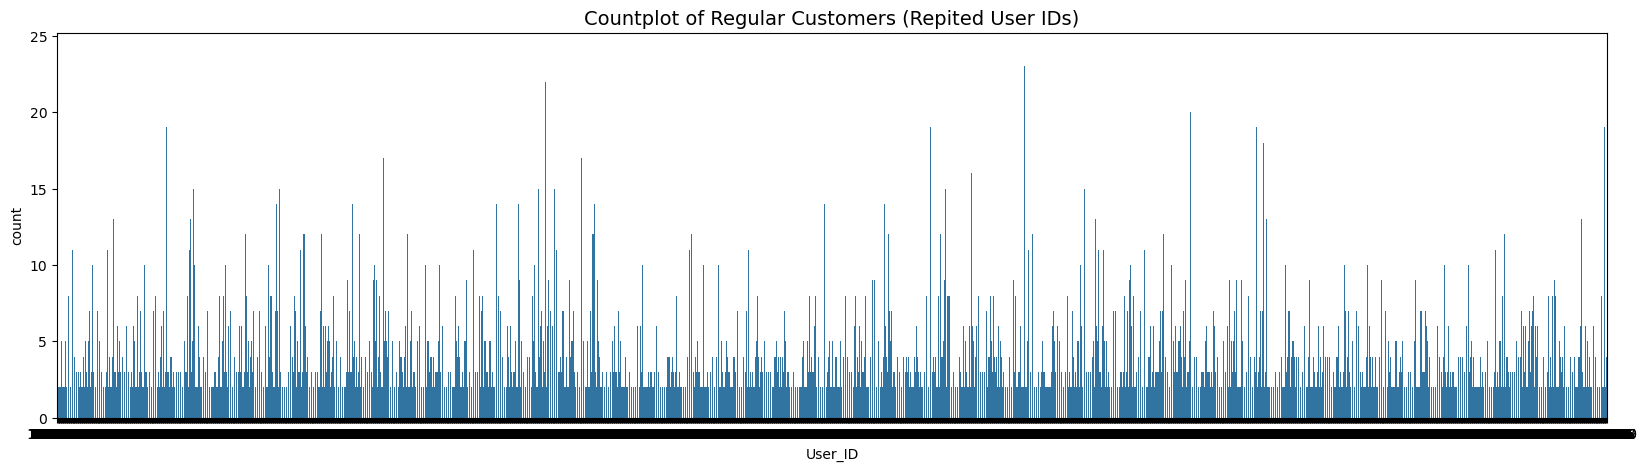

In [128]:
#step 3 ->import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sns.countplot(data=regular_customers, x='User_ID')
plt.title("Countplot of Regular Customers (Repited User IDs)",fontsize=14)
#plt.xticks(rotation=90)
plt.show()



# To check male vs Female 

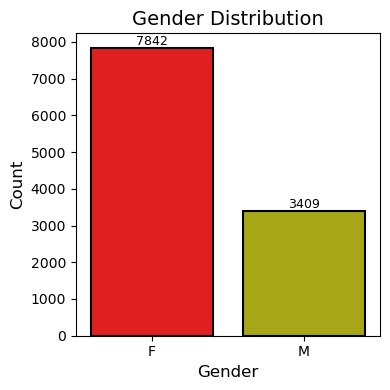

In [33]:

plt.figure(figsize=(4,4))

a = sns.countplot(
    x='Gender',
    hue='Gender',  
    data=df,
    palette=['r','y'],        # red = male, yellow = female
    linewidth=1.5,            # border thickness
    edgecolor='black',        # border color
    legend=False
)

# show labels on bars
a.bar_label(a.containers[0], fontsize=9)
a.bar_label(a.containers[1], fontsize=9)
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


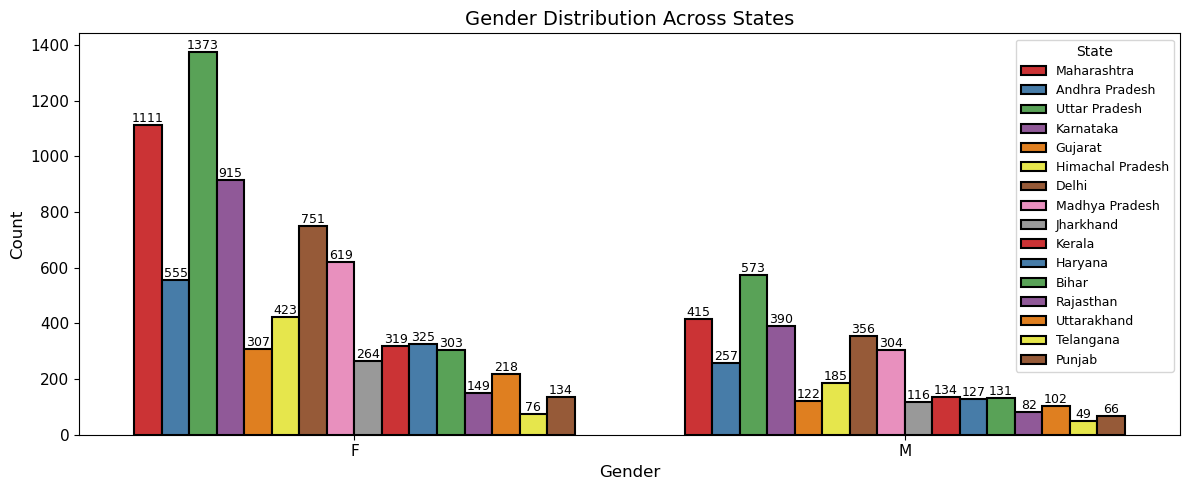

In [23]:
plt.figure(figsize=(12,5))   # bigger

a = sns.countplot(
    x='Gender',
    data=df,
    hue='State',
    palette='Set1',          # soft attractive colors set1 , set2.....
    edgecolor='black',       # border around bars
    linewidth=1.5            # border thickness
)

# add labels on bars
for container in a.containers:
    a.bar_label(container, fontsize=9)

plt.title("Gender Distribution Across States", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="State", fontsize=9)


plt.tight_layout()
plt.show()


# change data type of amount float to int 

In [131]:
df['Amount']=df['Amount'].astype('int')

In [132]:
df['Amount'].dtypes

dtype('int64')

# rename of column name 

In [134]:
df.rename(columns={'Marital_Status':'matrial_count'})
# to save perment use inplace = True 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,matrial_count,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [136]:
# use describe for any specific columns 
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


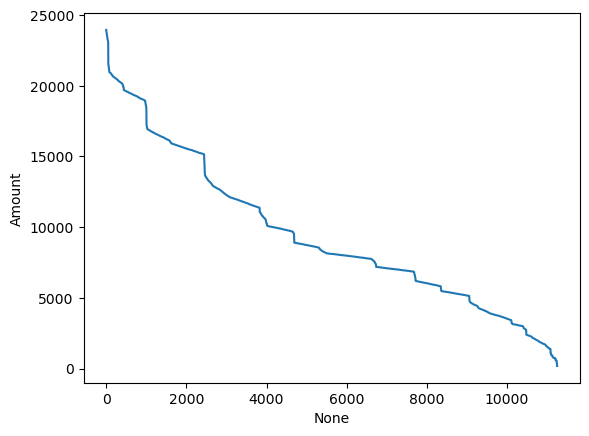

In [145]:
sns.lineplot(x=df.index, y=df['Amount'])
plt.show()


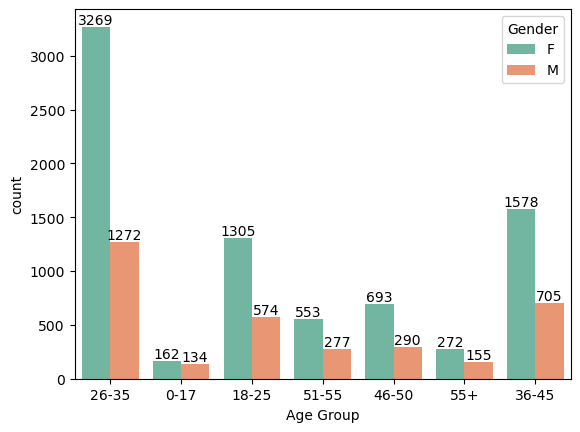

In [153]:
age=sns.countplot(data=df,x='Age Group',hue='Gender',palette='Set2')
for bar in age.containers:
    age.bar_label(bar)

# state and order 


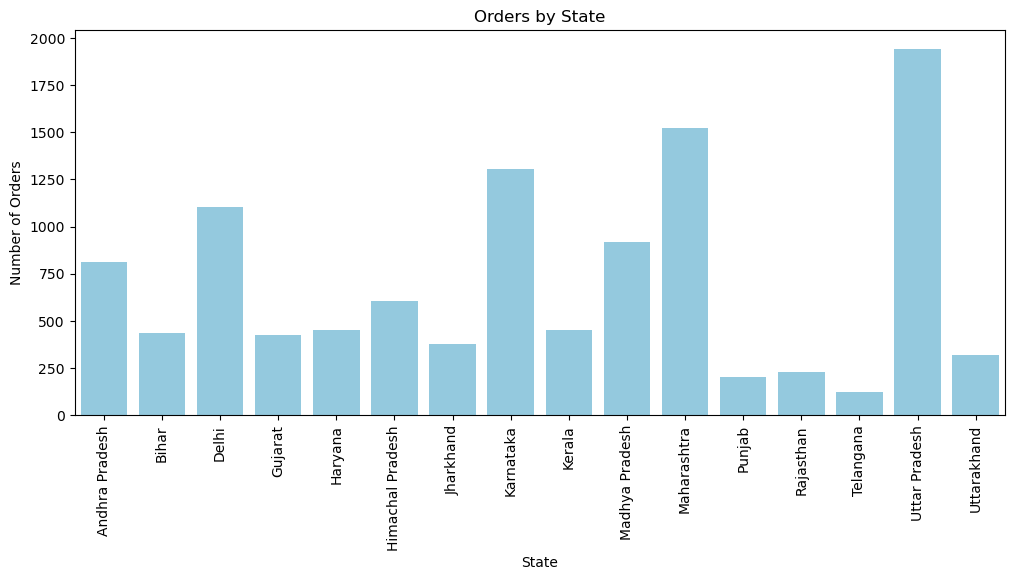

In [178]:
sale_states = df.groupby('State')['Orders'].count()

plt.figure(figsize=(12,5))
sns.barplot(x=sale_states.index, y=sale_states.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Orders by State")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

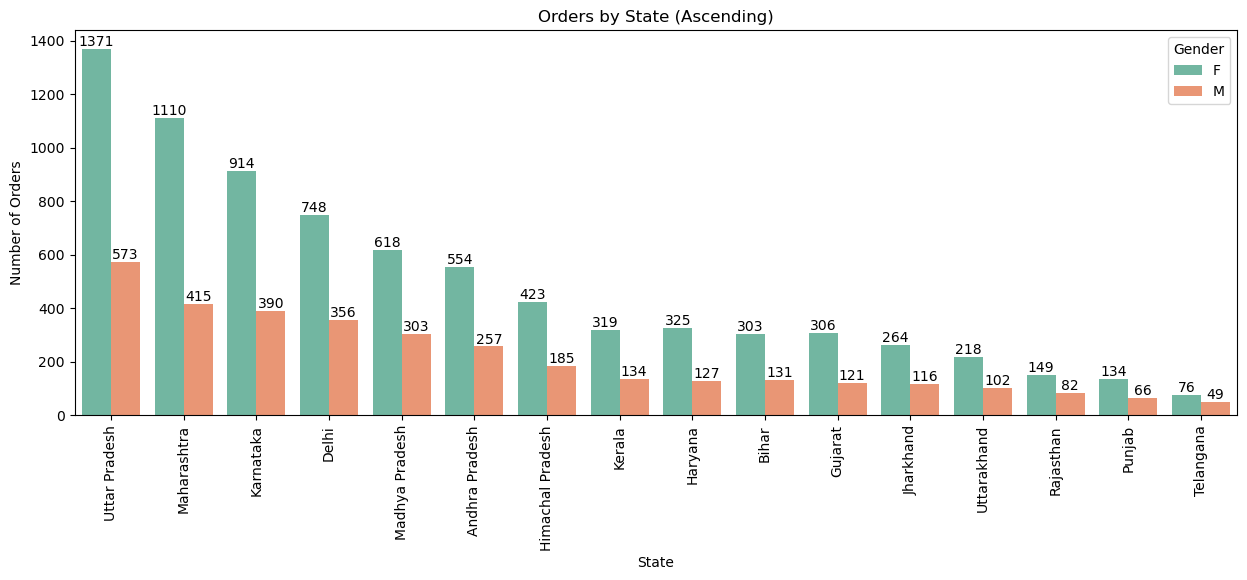

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get states sorted by total orders ascending
order_states = df['State'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(15,5))
ax=sns.countplot(data=df, x='State', hue='Gender', palette='Set2', order=order_states)

for bar in ax.containers:
    ax.bar_label(bar)
             
plt.xticks(rotation=90)
plt.title("Orders by State (Ascending)")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()


In [193]:
# Suppose the column is 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].map({1: 'Married', 0: 'Non Married'})
maritalvs_order=df.groupby('Marital_Status')['Orders'].count()


Series([], Name: Orders, dtype: int64)


# Occupation 

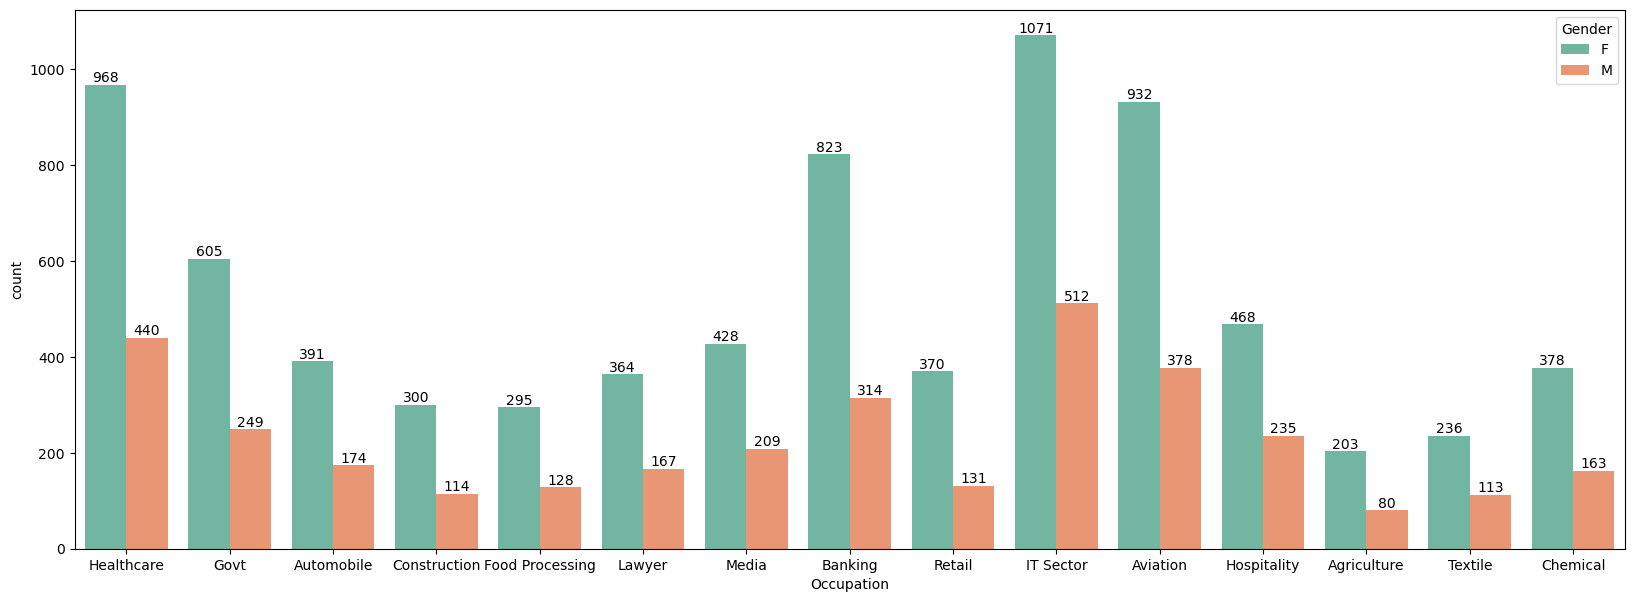

In [200]:
plt.figure(figsize=(20,7))
ax=sns.countplot(data=df,x='Occupation',hue="Gender",palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
    